# HRDPS Data

This demonstrates using data from Canada's High Resolution Deterministic Prediction System (HRDPS).

[HRDPS Model Description](https://eccc-msc.github.io/open-data/msc-data/nwp_hrdps/readme_hrdps-datamart_en/#data-location)

In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc
from paint.standard2 import cm_tmp, cm_wind

import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [2]:
H = Herbie(
    "2023-06-30 12:00",
    model="hrdps",
    fxx=0,
    product="continental/2.5km",
    variable="UGRD",
    level="AGL-10m",
)


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Jun-30 12:00 UTC F00 ┊ GRIB2 @ msc ┊ IDX @ None


In [6]:
H.PRODUCTS


{'continental/2.5km': 'continental domain',
 'north/grib2': 'north domain (experimental)'}

In [4]:
H.grib

'https://dd.weather.gc.ca/model_hrdps/continental/2.5km/12/000/20230630T12Z_MSC_HRDPS_UGRD_AGL-10m_RLatLon0.0225_PT000H.grib2'

In [5]:
H.SOURCES


{'msc': 'https://dd.weather.gc.ca/model_hrdps/continental/2.5km/12/000/20230630T12Z_MSC_HRDPS_UGRD_AGL-10m_RLatLon0.0225_PT000H.grib2'}

In [13]:
# Download the full file, because an index is not available
H.download()

# Recreate Herbie object so we can get the local file
H = Herbie(
    "2023-06-30 12:00",
    model="hrdps",
    fxx=0,
    product="continental/2.5km",
    variable="UGRD",
    level="AGL-10m",
)


✅ Found ┊ model=hrdps ┊ product=continental/2.5km ┊ 2023-Jun-30 12:00 UTC F00 ┊ GRIB2 @ local ┊ IDX @ None


In [15]:
H.inventory("UGR")


ParserError: Too many columns specified: expected 9 and found 7

In [16]:
ds = H.xarray()
ds


/home/blaylock/GITHUB/Herbie/herbie/core.py:1055: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


<xarray.Dataset>
Dimensions:              (y: 1290, x: 2540)
Coordinates:
    time                 datetime64[ns] 2023-06-30T12:00:00
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 10.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    u10                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             cwao
    GRIB_centreDescription:  Canadian Meteorological Service - Montreal
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Canadian Meteorological Service - Montreal
    model:                   hrdps
    product:                 continental/2.5km
    description:             Canada's High Resolution Deterministic Predictio...
    remote_grib:             /home/blaylock/data/hrdps/20230630/20230630T12Z_...
    local_grib:              /home/blaylock/data/hrdps/20230630/20230630T12Z_...
    searchString:            None

Text(0.0, 1.0, 'HRDPS: continental domain')

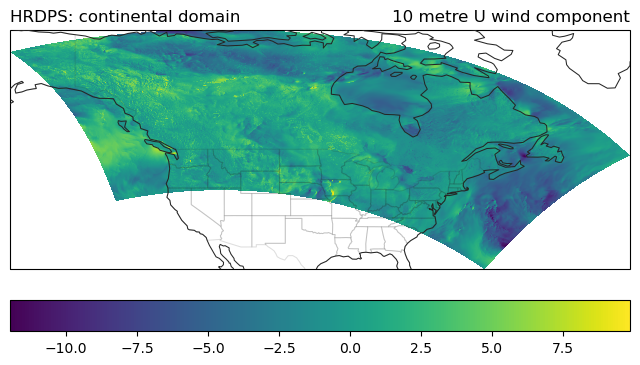

In [18]:
xvar = ds.u10

ax = EasyMap(figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    xvar,
    transform=pc,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
)

ax.set_title(xvar.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")


In [17]:
xvar = ds.u10

ax = EasyMap(crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    xvar,
    transform=pc,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
)

ax.set_title(xvar.GRIB_name, loc="right")
ax.set_title(f"{ds.model.upper()}: {H.product_description}", loc="left")

ValueError: Unhandled projection: rotated_latitude_longitude

---

North Domain